# Final Project
# DSC 550 Data Mining
# Kevin Danh

## Milestone 1

The focus of this project is to analyze the patterns of teen smartphone usage and its potential impact on addiction-related behaviors, using the [Teen Smartphone Usage and Addiction Impact Dataset from Kaggle](https://www.kaggle.com/datasets/sumedh1507/teen-phone-addiction). The increased usage of smartphones among teens has raised growing concerns about excessive screen time, social media dependence, and potential effects on mental health, academic performance, and social interactions. My goal is to explore these relationships and develop a model that can predict the likelihood of smartphone addiction based on usage patterns, demographic factors, and behavioral indicators.

The business problem addressed here is understanding the key drivers and patterns of teen smartphone usage can provide valuable insights for educators, parents, and policymakers seeking to mitigate excessive use. Furthermore, building a predictive model that identifies teens at higher risk of smartphone addiction can help stakeholders implement targeted interventions, design awareness programs, and develop monitoring tools. The target variable for the model will be a binary indicator of smartphone addiction, derived from survey scores and self-reported measures within the dataset. This allows the model to classify teens as either at risk or not at risk of developing addictive smartphone behaviors.

The approach to this project involves several steps. Initially, data cleaning and preprocessing will ensure that the dataset is consistent, free from missing values, and properly formatted for analysis. Exploratory data analysiswill uncover trends, correlations, and potential outliers in smartphone usage, such as average daily screen time, social media frequency, and app usage patterns. Feature engineering will focus on creating meaningful predictors, such as aggregated usage metrics or behavioral ratios, which can enhance model performance. Once the data is prepared, classification models — such as logistic regression, decision trees, or random forests — will be trained and evaluated to predict addiction risk, using metrics like accuracy, precision, recall, and F1-score.

In conclusion, this analysis aims to provide actionable insights into teen smartphone behavior, identifying key factors associated with overuse and addiction. By combining data exploration, feature engineering, and predictive modeling, the project will help quantify risks and highlight patterns that may inform interventions or policy decisions. In addition, ethical considerations will be carefully addressed to ensure that the analysis respects privacy and avoids bias, particularly when handling sensitive demographic and behavioral data.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
# Load the dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.head(10)

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,1.1,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8
6,7,Hailey Moses,16,Male,North Jeffrey,11th,6.3,6.7,89,3,...,0.8,129,9,1.8,2.7,1.0,Education,7,7.8,10.0
7,8,Veronica Marshall,13,Other,Jenniferport,10th,5.1,6.1,70,2,...,1.0,34,7,2.3,1.6,0.5,Browsing,9,8.0,8.0
8,9,Edward Avila,13,Male,Leebury,8th,3.0,9.1,79,0,...,0.9,70,13,2.7,2.2,1.3,Education,10,9.1,7.3
9,10,James Carter,18,Other,Prestonview,11th,3.9,5.8,89,8,...,0.9,121,13,2.7,0.4,1.0,Other,9,2.9,9.1


In [27]:
# Check the shape of the dataset
df.shape

(3000, 25)

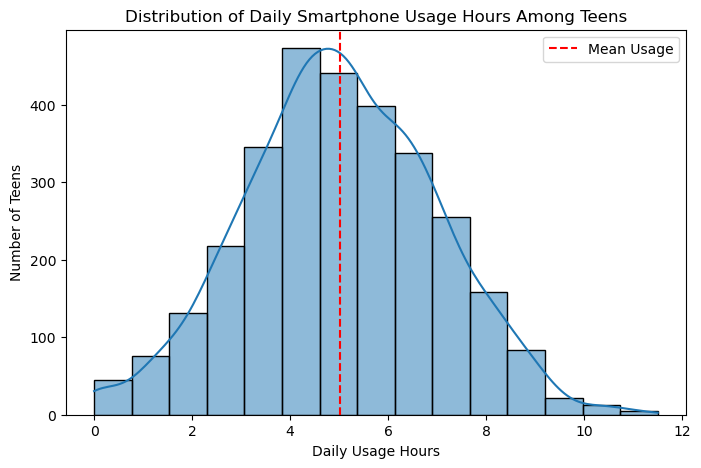

In [18]:
# Create a histogram showing the distribution of the dataset
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], bins=15, kde=True)
plt.title('Distribution of Daily Smartphone Usage Hours Among Teens')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Number of Teens')
plt.axvline(df['Daily_Usage_Hours'].mean(), color='red', linestyle='--', label='Mean Usage')
plt.legend()
plt.show()

Most teens use their phones between 2 and 6 hours daily, with a peak around 4–5 hours. A smaller group uses phones more than 8 hours/day, indicating potential overuse. The mean usage (red line) highlights the average screen time and shows that many teens are near or above this threshold. Daily usage alone can indicate potential addiction risk, as teens with very high screen time may be more vulnerable to negative outcomes like reduced sleep or lower academic performance.

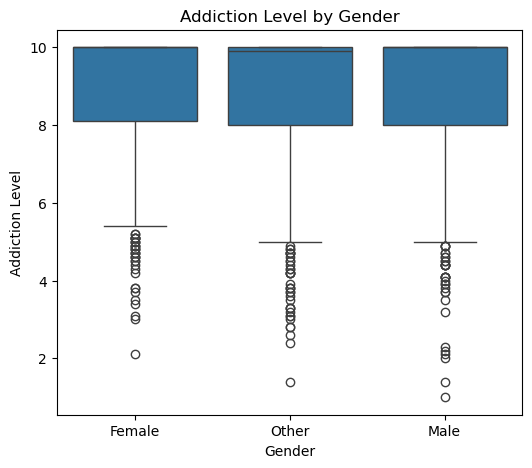

In [19]:
# Create a boxplot showing the spread of the dataset
plt.figure(figsize=(6,5))
sns.boxplot(x='Gender', y='Addiction_Level', data=df)
plt.title('Addiction Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Addiction Level')
plt.show()

The median addiction levels are slightly higher for females compared to males and others. Outliers exist across all genders, indicating that some individuals of each gender are at very high risk. Targeted interventions might need to consider gender trends, but individual behavior is still the strongest predictor of addiction.

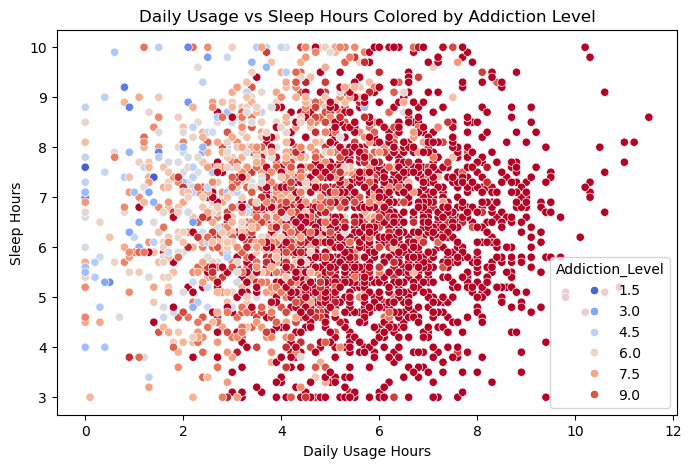

In [23]:
# Show a scatterplot of the addiction levels between daily usage and sleep
plt.figure(figsize=(8,5))
sns.scatterplot(x='Daily_Usage_Hours', y='Sleep_Hours', hue='Addiction_Level', palette='coolwarm', data=df)
plt.title('Daily Usage vs Sleep Hours Colored by Addiction Level')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Sleep Hours')
plt.show()

Teens with higher daily phone usage tend to sleep fewer hours but some also managed to get a good amount of sleep. Lower usage teens tend to sleep more and have lower addiction scores. Excessive smartphone use may directly impact sleep, which is a critical factor in teen health and academic performance. Sleep reduction can serve as a behavioral indicator of addiction risk.

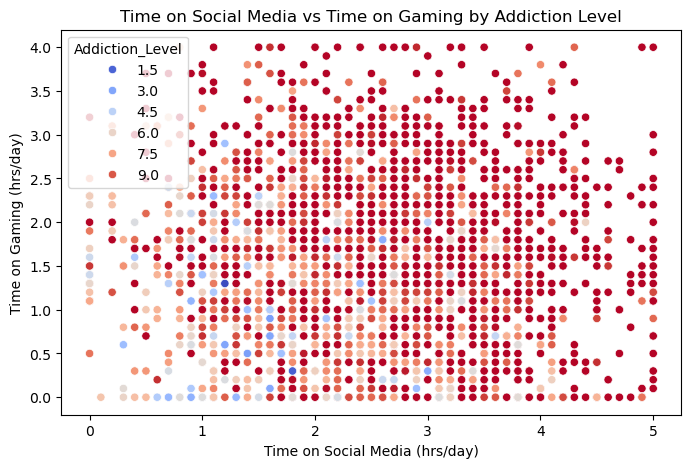

In [24]:
# Show a scatterplot of the addiction levels between those spending time on both gaming and social media
plt.figure(figsize=(8,5))
sns.scatterplot(x='Time_on_Social_Media', y='Time_on_Gaming', hue='Addiction_Level', palette='coolwarm', data=df)
plt.title('Time on Social Media vs Time on Gaming by Addiction Level')
plt.xlabel('Time on Social Media (hrs/day)')
plt.ylabel('Time on Gaming (hrs/day)')
plt.show()

Teens who spend more hours on both social media and gaming tend to have higher addiction scores, but looks as if it is balanced across the board. Some teens focus on one activity (social media or gaming) and still have moderate addiction risk. Behavioral patterns such as simultaneous high engagement in social media and gaming are strong indicators of smartphone addiction. This can guide predictive modeling features.

In conclusion, this introductory exploratory analysis suggests that smartphone addiction among teens is primarily driven by behavioral usage patterns rather than demographics alone. High daily usage, poor sleep, and multi-platform engagement are key indicators of risk. These insights provide a foundation for feature engineering in predictive modeling and for designing targeted interventions to reduce addiction risk.